In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

*Used-Car Depreciation Analysis (Age & Mileage Based)*

In [3]:
df_cars=pd.read_csv("cleaned_data.csv")

In [4]:
plot_df = (
    df_cars
    .groupby(["make", "vehicle_age"], as_index=False)["sellingprice"]
    .mean()
)

In [5]:
top_ten=df_cars["make"].value_counts()[0:10]

In [6]:
t_ten_make=pd.DataFrame(top_ten).reset_index()["make"]

In [7]:
plot_df_filtered = plot_df[plot_df["make"].isin(t_ten_make)]

In [8]:
plot_df_filtered

,make,vehicle_age,sellingprice
2240,Bmw,0.119,39029.411765
2241,Bmw,0.124,64000.000000
2242,Bmw,0.138,27600.000000
2243,Bmw,0.146,30000.000000
2244,Bmw,0.157,36305.357143
...,...,...,...
40128,Toyota,25.160,375.000000
40129,Toyota,25.258,325.000000
40130,Toyota,25.264,550.000000
40131,Toyota,26.047,800.000000


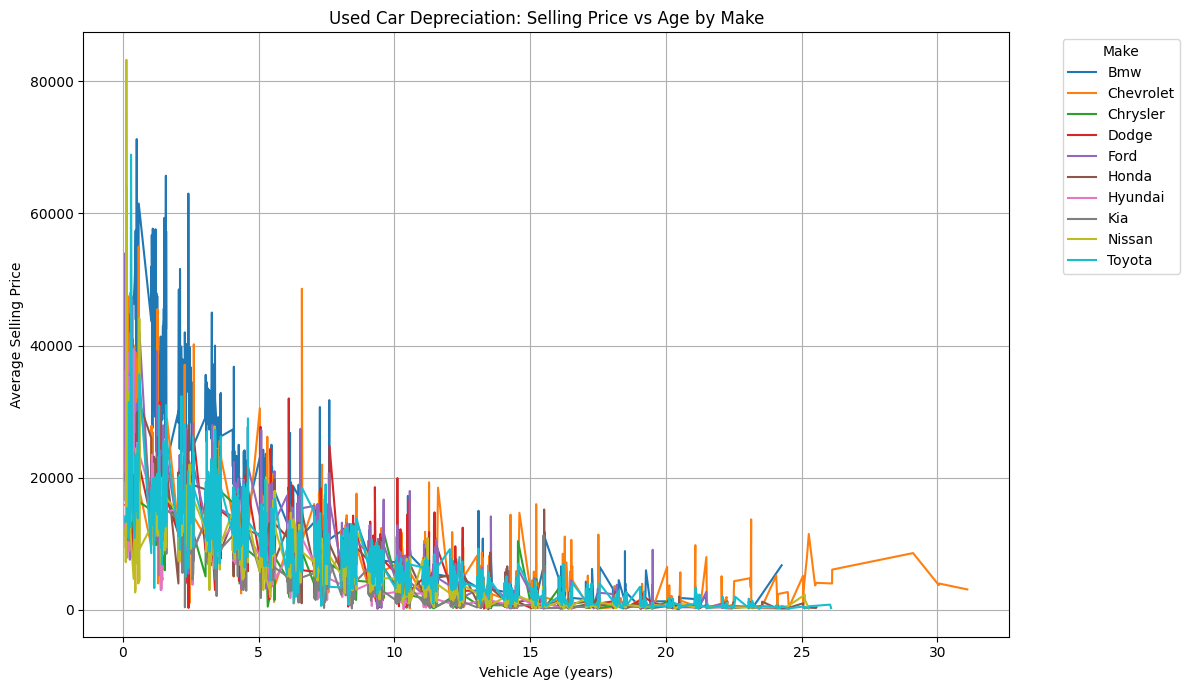

In [9]:
plt.figure(figsize=(12, 7))

for make, grp in plot_df_filtered.groupby("make"):
    plt.plot(
        grp["vehicle_age"],
        grp["sellingprice"],
        label=make
    )

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price")
plt.title("Used Car Depreciation: Selling Price vs Age by Make")
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

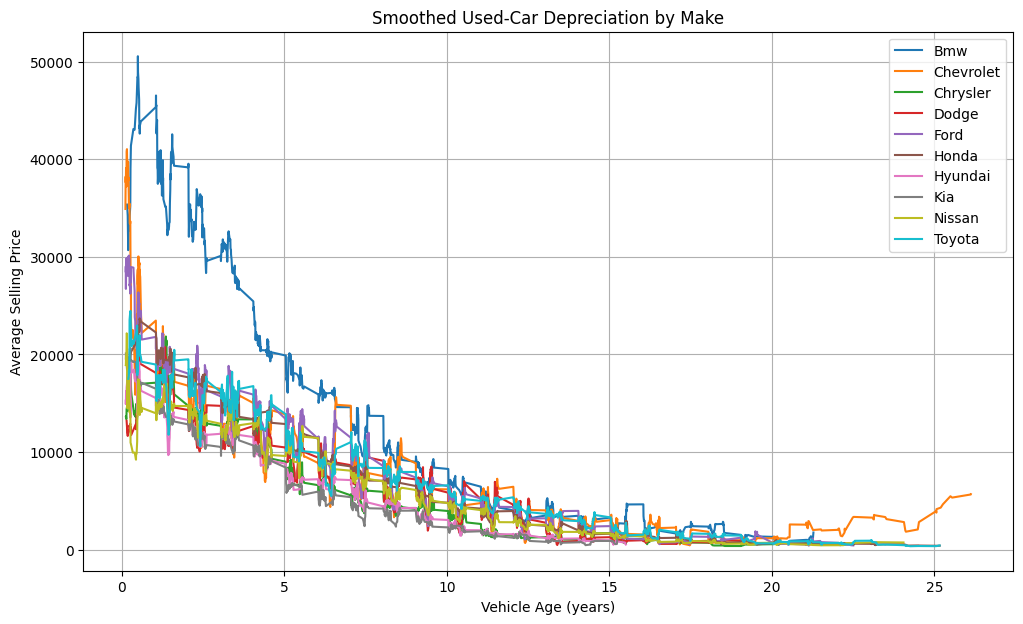

In [10]:
window = 10 

plt.figure(figsize=(12, 7))

for make, grp in plot_df_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = grp["sellingprice"].rolling(window=window, center=True).mean()

    plt.plot(grp["vehicle_age"], smoothed, label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price")
plt.title("Smoothed Used-Car Depreciation by Make")
plt.legend()
plt.grid(True)
plt.show()

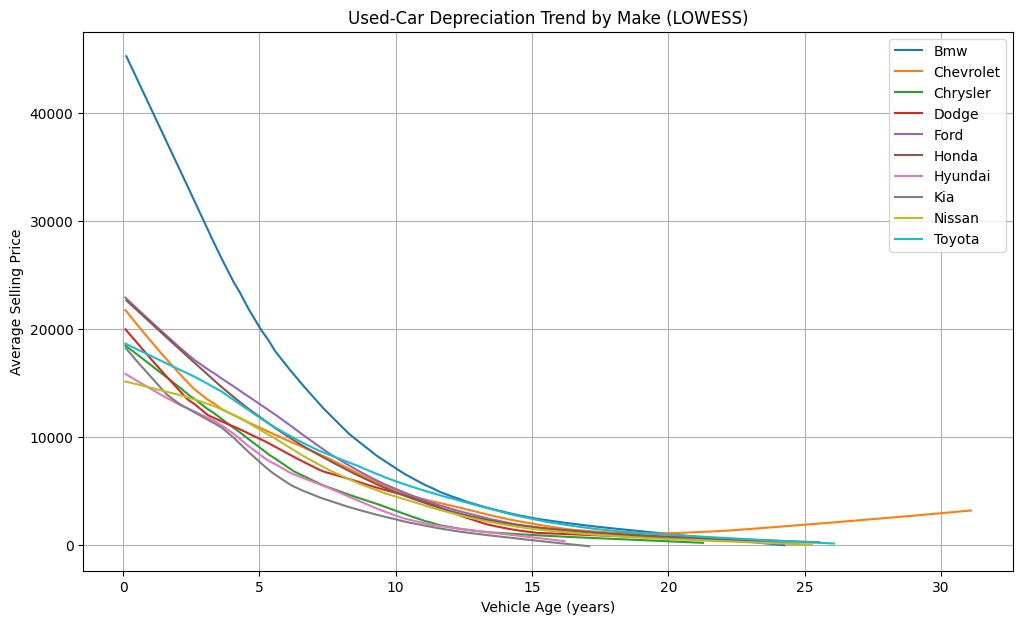

In [11]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(12, 7))

for make, grp in plot_df_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = lowess(
        grp["sellingprice"],
        grp["vehicle_age"],
        frac=0.3  # smoothing strength (0.2–0.4 works well)
    )

    plt.plot(smoothed[:, 0], smoothed[:, 1], label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price")
plt.title("Used-Car Depreciation Trend by Make (LOWESS)")
plt.legend()
plt.grid(True)
plt.show()